In [170]:
import pandas as pd
import seaborn as sns


In [195]:
file_path = "/Users/akopiichenko/Desktop/Netflix_IMDB_Scores/Netflix_TV_Shows_and_Movies.csv"
netflix = pd.read_csv(file_path)
print(netflix.head(30))

    index        id                                      title   type  \
0       0   tm84618                                Taxi Driver  MOVIE   
1       1  tm127384            Monty Python and the Holy Grail  MOVIE   
2       2   tm70993                              Life of Brian  MOVIE   
3       3  tm190788                               The Exorcist  MOVIE   
4       4   ts22164               Monty Python's Flying Circus   SHOW   
5       5   tm14873                                Dirty Harry  MOVIE   
6       6  tm185072                               My Fair Lady  MOVIE   
7       7   tm98978                            The Blue Lagoon  MOVIE   
8       8  tm119281                           Bonnie and Clyde  MOVIE   
9       9   tm67378                          The Professionals  MOVIE   
10     10   tm44204                       The Guns of Navarone  MOVIE   
11     11   tm69778  Lupin the Third: The Castle of Cagliostro  MOVIE   
12     12   tm69997             Richard Pryor: Live

In [172]:
"""Define percentage on NaN in columns"""

sum_NaN = netflix.isna().sum()
columns_totals = len(netflix)
percentage_NaN = sum_NaN / columns_totals * 100
print(percentage_NaN)

index                 0.000000
id                    0.000000
title                 0.000000
type                  0.000000
description           0.094643
release_year          0.000000
age_certification    43.251940
runtime               0.000000
imdb_id               0.000000
imdb_score            0.000000
imdb_votes            0.302858
dtype: float64


In [173]:
"""Check existence of duplicates"""

duplicates = netflix.duplicated()
print(duplicates.sum())

print(netflix.shape[0])
print(netflix.drop_duplicates().shape[0])

0
5283
5283


Statistic: 519.1704687894171, Critical Values: [0.576 0.656 0.786 0.917 1.091], Significance Levels: [15.  10.   5.   2.5  1. ]


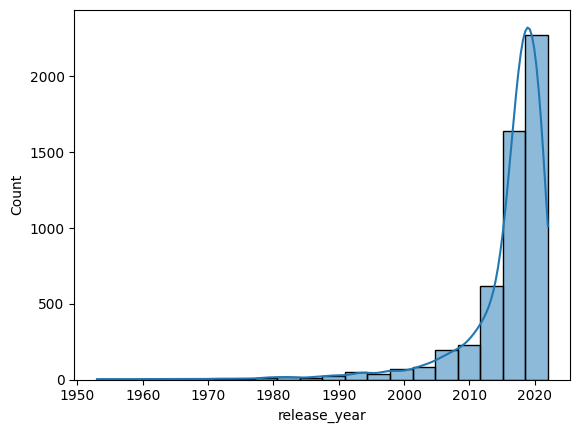

In [174]:
"""Check normal release year"""

sns.histplot(netflix['release_year'], kde=True, bins=20)

from scipy.stats import anderson

result = anderson(netflix['release_year'])
print(f'Statistic: {result.statistic}, Critical Values: {result.critical_values}, Significance Levels: {result.significance_level}')

# A smaller test statistic and higher critical values suggest that the data follows a normal distribution.

# 2017-2018


Statistic: 45.42485446730461, Critical Values: [0.576 0.656 0.786 0.917 1.091], Significance Levels: [15.  10.   5.   2.5  1. ]


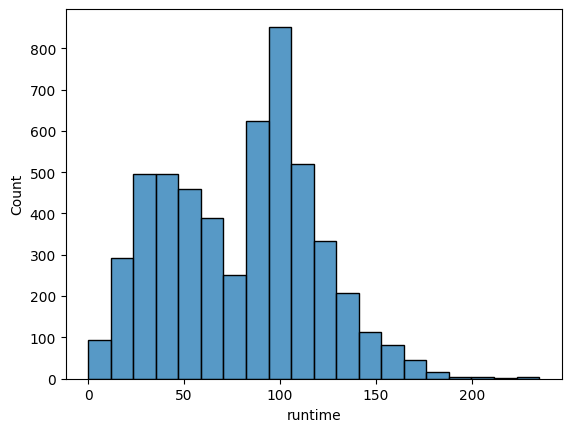

In [175]:
"""Check normal runtime"""

sns.histplot(netflix['runtime'], bins=20)

from scipy.stats import anderson

result = anderson(netflix['runtime'])
print(f'Statistic: {result.statistic}, Critical Values: {result.critical_values}, Significance Levels: {result.significance_level}')

<Axes: xlabel='runtime', ylabel='Count'>

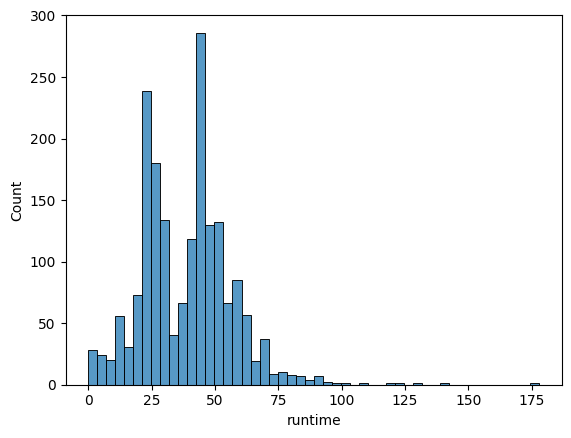

In [176]:
"""Building histogram for runtime for shows"""

# filtering Netflix dataframe by type 'SHOW'
shows = netflix.loc[netflix.type == 'SHOW']

# building histogram for runtime of movies
sns.histplot(shows['runtime'], bins=50)


<Axes: xlabel='runtime', ylabel='Count'>

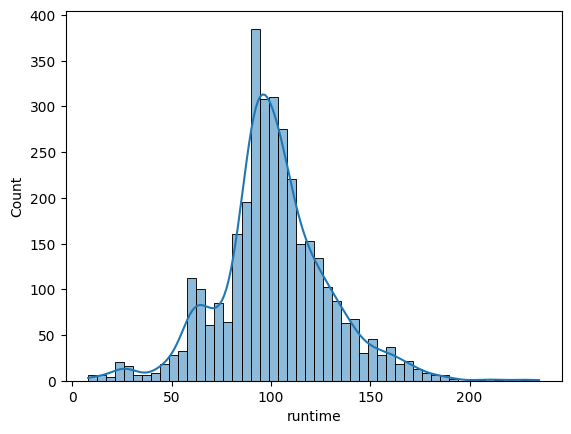

In [177]:
"""Building displot for runtime for movies"""

# filtering Netflix dataframe by type 'MOVIE'
movies = netflix.loc[netflix.type == 'MOVIE']

# building histogram for runtime of shows
sns.histplot(movies['runtime'], kde = True, bins=50)

Statistic: 24.13819008979226, Critical Values: [0.576 0.656 0.786 0.917 1.091], Significance Levels: [15.  10.   5.   2.5  1. ]


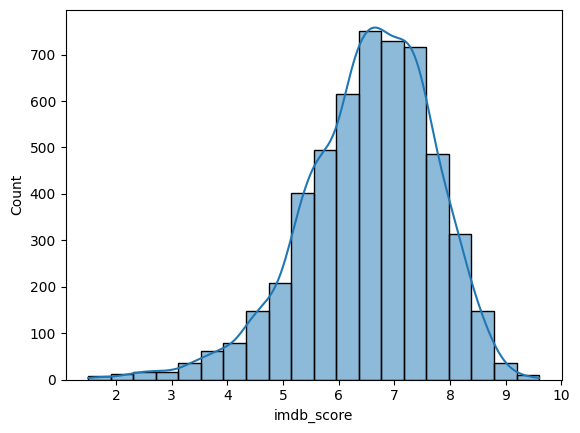

In [178]:
"""Check normal imdb_score"""

import seaborn as sns

sns.histplot(netflix['imdb_score'], kde=True, bins=20)

from scipy.stats import anderson

result = anderson(netflix['imdb_score'])
print(f'Statistic: {result.statistic}, Critical Values: {result.critical_values}, Significance Levels: {result.significance_level}')

<Axes: xlabel='imdb_score_groups', ylabel='Count'>

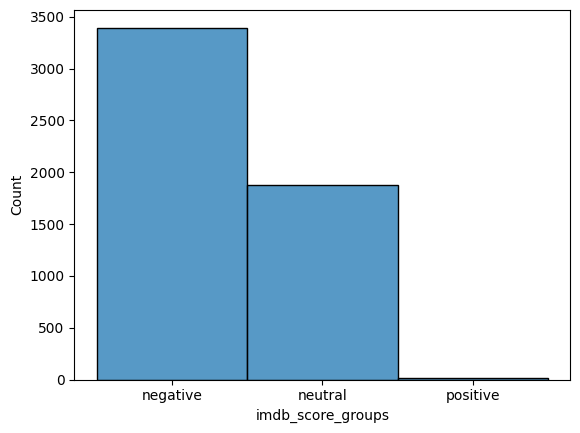

In [179]:
"""Cut imdb_score into groups - 1-6 negative, 7-8 neutral, 9-10 positive"""

netflix['imdb_score_groups'] = pd.cut(netflix['imdb_score'], bins=[1, 7, 9, float('inf')], labels=['negative', 'neutral', 'positive'])

sns.histplot(netflix['imdb_score_groups'], bins=100)


([<matplotlib.axis.XTick at 0x153dac140>,
 [Text(1.5, 0, '(1.5,)'),
  Text(6.2, 0, '(6.2,)'),
  Text(7.1, 0, '(7.1,)'),
  Text(9.6, 0, '(9.6,)')])

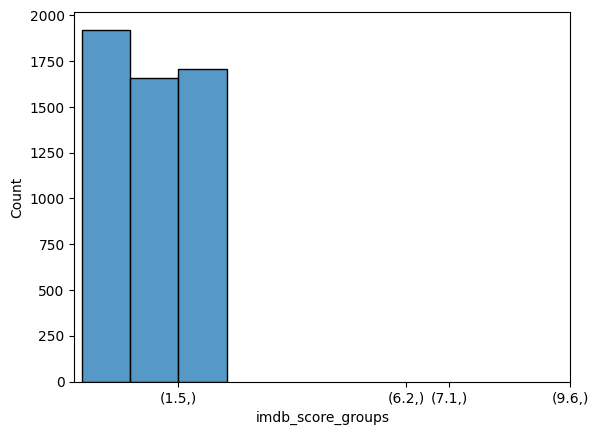

In [180]:
"""Cut imdb_score into percentiles"""

# sorting values by imdb_score from min to max
netflix_sorted_by_imdb_score = netflix.sort_values(by='imdb_score', ascending=True)

# creating new columns with imdb_score_groups
netflix_sorted_by_imdb_score['imdb_score_groups'], bins = pd.qcut(netflix_sorted_by_imdb_score['imdb_score'], q=3, labels=['1st percentile', '2d percentile', '3d percentile'], retbins= True)
bins_edges = bins

import matplotlib.pyplot as plt

# creating histogram
sns.histplot(netflix_sorted_by_imdb_score['imdb_score_groups'], bins= bins_edges)
plt.xticks(bins_edges, [f'{end}'for end in zip(bins_edges)])

# question - how percentiles are cut? firstly all scores are ordered and than cut on 4 equal parts? what scores are in each percentile?

Statistic: nan, Critical Values: [0.576 0.656 0.786 0.917 1.091], Significance Levels: [15.  10.   5.   2.5  1. ]


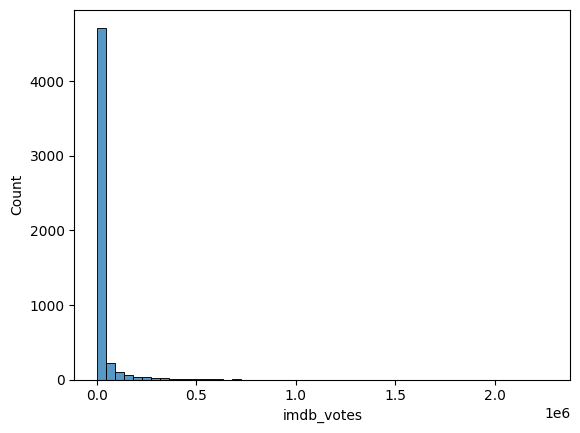

In [181]:
"""Check normal imdb_votes"""

sns.histplot(netflix['imdb_votes'], bins=50)

from scipy.stats import anderson

result = anderson(netflix['imdb_votes'])
print(f'Statistic: {result.statistic}, Critical Values: {result.critical_values}, Significance Levels: {result.significance_level}')

<Axes: xlabel='imdb_votes_groups', ylabel='Count'>

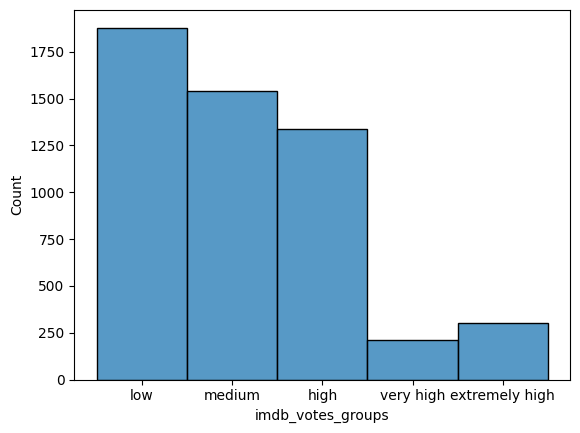

In [198]:
"""Cut imdb_votes into groups"""

netflix['imdb_votes_groups'] = pd.cut(netflix['imdb_votes'], bins=[0, 1000, 5000, 50000, 100000, float('inf')], labels=['low', 'medium', 'high', 'very high', 'extremely high'])

sns.histplot(netflix['imdb_votes_groups'])

<Axes: xlabel='age_certification', ylabel='Count'>

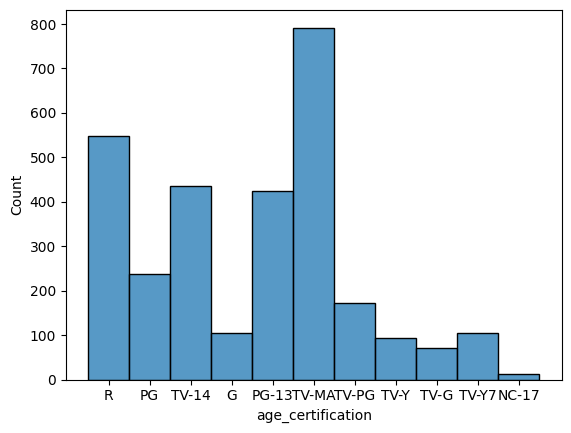

In [183]:
"""Visualization  histplot for age_certification, type"""

import seaborn as sns

sns.histplot(netflix['age_certification'])

<Axes: xlabel='type', ylabel='Count'>

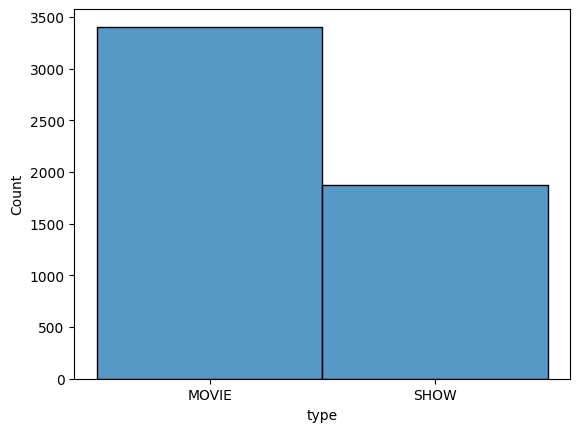

In [184]:
"""Visualization  histplot for type"""

import seaborn as sns

sns.histplot(netflix['type'])